## Workshop 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a fundamental component of data science - when you've collected or been shared a dataset, EDA is one of the first things you should do. In this notebook we will go through the EDA example from the lectures with code, and then start applying EDA to an unseen dataset.

## EDA of a dataset of nanoparticles for brain delivery

We are going to start by studying the data from Yousfan et al. https://pubs.acs.org/doi/10.1021/acs.molpharmaceut.3c00880

A .pdf of the paper is also available on the github.

The first stage of any EDA is to look at the data - in this case the data is saved as an excel spreadsheet available in the github repository. I would suggest you look at the dataset in excel. The filename is: Nanoparticle_braindelivery_data.xlsx

This is supplementary table 2 from the publication, and represents the "final" dataset that the authors generated.

### Part 1: Looking at and understanding the data

#### Question 1

Comparing the dataset with the paper - particularly Figure 2 showing the Krona chart:
~
Which features (columns) of the data refer to properties of the drug, properties of the nanoparticles, and ways in which the nanoparticles were made?

(Double click this cell to edit it)

Drug properties:

Nanoparticle properties:

Nanoparticle manufacturing properties:

#### Question 2

Referring to the paper, what do the columns TMax, and AUC refer to?

(Double click this cell to edit it)

TMax:

AUC:

To start our EDA, we need to load the data into python. To do this we need to load a "library". Libraries allow you to load code and functions that other people have written for specific purposes. We are going to use the library called "pandas" to load data into python. Pandas is a library written for working with data in what are called "Dataframes" and is the most popular library for working with data in data science.

In [3]:
import pandas as pd   ## We load pandas and refer to it by pd. Now every time we use "pd" python knows we are referring to pandas

nanoparticle_data = pd.read_excel("./Nanoparticle_braindelivery_data.xlsx")   ## The read_excel function lets us load an excel file into a dataframe

In [8]:
nanoparticle_data ## We can look at the dataframe by typing its name

,Weight,logP,Solubility,Pgp,DrugCarrierRatio,Position,Comp1,Comp2,Size,Zeta,Cmax,AUC,Tmax,Release,Route
0,321.9930,3.01,0.132,no,1.000,core,chitosan,none,172.40,30.30,2.256,0.594,1.00,2.291667,IN
1,315.4800,4.70,0.009,no,1.000,core,PLGA,PEG,122.00,-21.28,1.400,1.879,1.00,1.142857,IN
2,284.7400,2.63,0.012,yes,0.156,core,PLGA,none,170.15,-15.00,1.306,1.361,0.50,2.500000,IN
3,171.2383,2.26,0.025,no,1.000,core,chitosan,none,153.00,-5.13,1.413,0.591,0.25,6.666667,IN
4,853.9060,3.20,0.006,yes,0.100,core,PLGA,none,136.78,-38.76,0.237,0.190,1.00,2.083333,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,326.1300,3.67,0.186,yes,1.000,core,solid lipid,phospholipids,96.70,21.30,3.000,1.400,3.00,1.370000,IV
129,348.3520,1.91,0.511,yes,0.120,core,phospholipids,solid lipid,196.80,-45.20,3.500,1.300,6.00,0.500000,IV
130,319.8500,3.61,0.030,no,0.300,core,PLGA,none,166.90,-32.12,1.200,1.400,1.00,0.670000,IV
131,315.4800,5.01,0.009,no,1.000,core,chitosan,none,75.37,25.35,0.589,0.620,1.00,8.500000,IV


In [9]:
nanoparticle_data.shape ## adding .shape to the end of the name of a dataframe tells you its dimensions

(133, 15)

In [16]:
nanoparticle_data.columns ## adding .columns tells us about the column names

Index(['Weight', 'logP', 'Solubility', 'Pgp', 'DrugCarrierRatio', 'Position',
       'Comp1', 'Comp2', 'Size', 'Zeta', 'Cmax', 'AUC', 'Tmax', 'Release',
       'Route'],
      dtype='object')

In [19]:
nanoparticle_data.describe() ## using .describe() we can look at the metrics for the numerical columns

,Weight,logP,Solubility,DrugCarrierRatio,Size,Zeta,Cmax,AUC,Tmax,Release
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,319.045544,2.769361,0.159267,0.284526,147.688120,-8.941429,1.112105,1.142068,2.257331,5.277248
std,92.970825,1.238233,0.220841,0.343883,71.730265,25.376764,1.075297,1.132456,2.285802,5.859029
min,146.143000,-2.560000,0.000000,0.007000,19.000000,-76.000000,0.008000,0.010000,0.028000,0.126250
25%,243.301000,1.910000,0.008000,0.100000,97.360000,-24.100000,0.197000,0.202000,1.000000,1.029412
50%,315.027000,2.930000,0.071000,0.100000,150.200000,-15.780000,0.882000,0.813000,1.000000,3.130000
75%,368.380000,3.620000,0.166000,0.300000,189.000000,-4.000000,1.589000,1.766000,4.000000,6.666667
max,853.906000,5.210000,1.000000,2.000000,400.000000,55.470000,5.522000,5.456000,12.000000,25.000000


In [21]:
nanoparticle_data.info() ## info tells you about all the columns - including the non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Weight            133 non-null    float64
 1   logP              133 non-null    float64
 2   Solubility        133 non-null    float64
 3   Pgp               133 non-null    object 
 4   DrugCarrierRatio  133 non-null    float64
 5   Position          133 non-null    object 
 6   Comp1             133 non-null    object 
 7   Comp2             133 non-null    object 
 8   Size              133 non-null    float64
 9   Zeta              133 non-null    float64
 10  Cmax              133 non-null    float64
 11  AUC               133 non-null    float64
 12  Tmax              133 non-null    float64
 13  Release           133 non-null    float64
 14  Route             133 non-null    object 
dtypes: float64(10), object(5)
memory usage: 15.7+ KB


#### Handling missing values

We can look for missing values using "isnull"

In [25]:
nanoparticle_data.isnull().sum() ## This tells us how many missing values there are

Weight              0
logP                0
Solubility          0
Pgp                 0
DrugCarrierRatio    0
Position            0
Comp1               0
Comp2               0
Size                0
Zeta                0
Cmax                0
AUC                 0
Tmax                0
Release             0
Route               0
dtype: int64

In [27]:
## In our case there are no missing values - but there are tools for dealing with them such as:

nanoparticle_data = nanoparticle_data.fillna(0) ## This will replace any missing value with a zero

#### Exploring individual variables

In [11]:
## You can look at individual columns in pandas by "slicing" the column using square brackets

nanoparticle_data["Weight"] ## get all the weights

0      321.9930
1      315.4800
2      284.7400
3      171.2383
4      853.9060
         ...   
128    326.1300
129    348.3520
130    319.8500
131    315.4800
132    321.9930
Name: Weight, Length: 133, dtype: float64

<Axes: xlabel='Weight', ylabel='Count'>

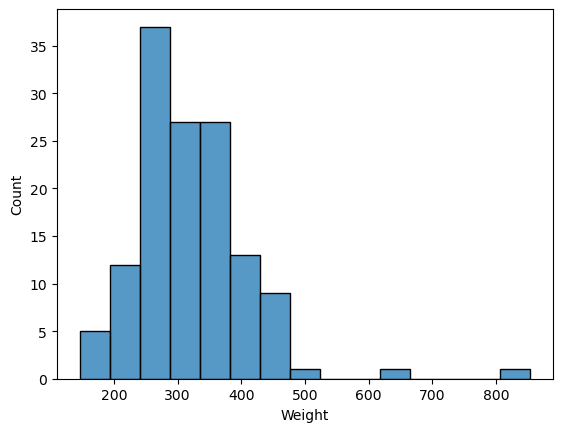

In [12]:
## Plotting using pandas is extremely easy. To do this we can use another set of libraries call matplotlib, and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

## Most plots can be generated using a single line of code, and by giving the plotting function the slice of data you want to plot
sns.histplot(nanoparticle_data["Weight"]) ## histplot is a histogram

<Axes: xlabel='Weight', ylabel='Count'>

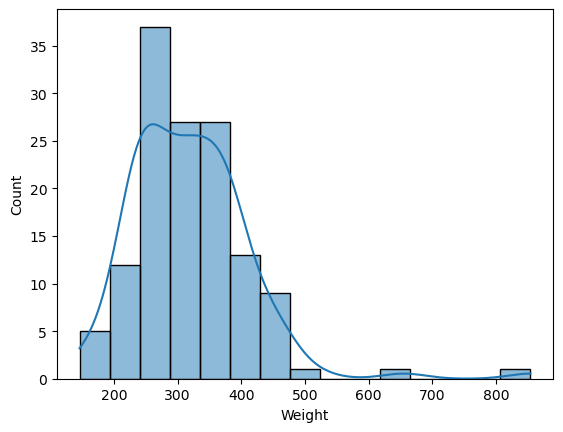

In [14]:
sns.histplot(nanoparticle_data["Weight"], kde = True) 
## Adding a "kde" refers to a Kernel density estimate: https://en.wikipedia.org/wiki/Kernel_density_estimation
## KDE is essentially a way of "smoothening" the distribution

### Question 3
Use chatgpt or equivalent and see if you can plot the distributions of all the numerical columns in one figure that has multiple plots

#### Boxplots
Here is a brief overview of what a boxplot actually shows from Newcastle University:
https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/data-presentation/box-and-whisker-plots.html

The below boxplot is for the same column we looked at previously

<Axes: ylabel='Weight'>

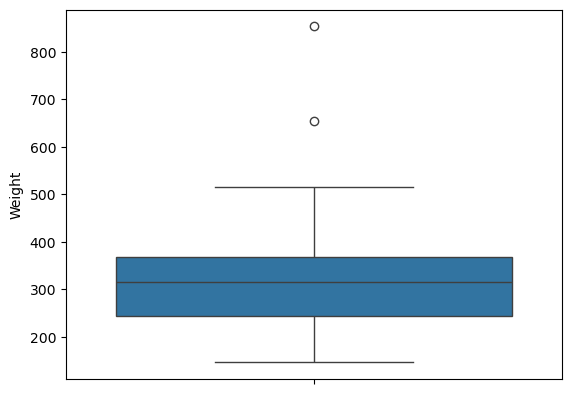

In [34]:
sns.boxplot(nanoparticle_data["Weight"]) ## A boxplot lets you see outliers and how "central" the mean is

#### Question 4

Make a boxplot and histogram for the column representing the AUC. What can you infer from the boxplot?

In [42]:
## Make a boxplot of the AUC

### Categorical variables
Categorical values can be plotted as a "countplot" (bar chart), or pie chart

<Axes: xlabel='count', ylabel='Route'>

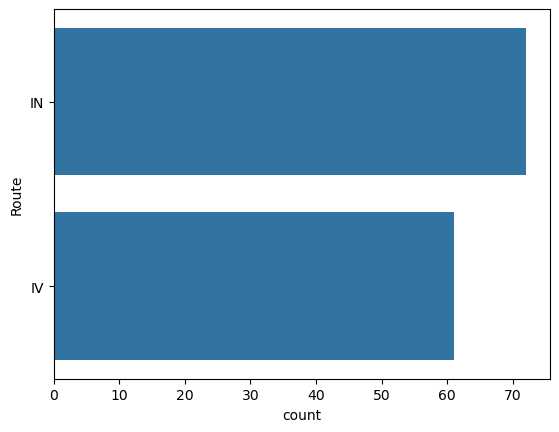

In [44]:
sns.countplot(nanoparticle_data["Route"])

Pie charts have some issues with visualisation: https://www.data-to-viz.com/caveat/pie.html

So the convention is to use a barchart, or other alternatives where the reader doesnt have to interpret angles

<Axes: xlabel='count', ylabel='Comp1'>

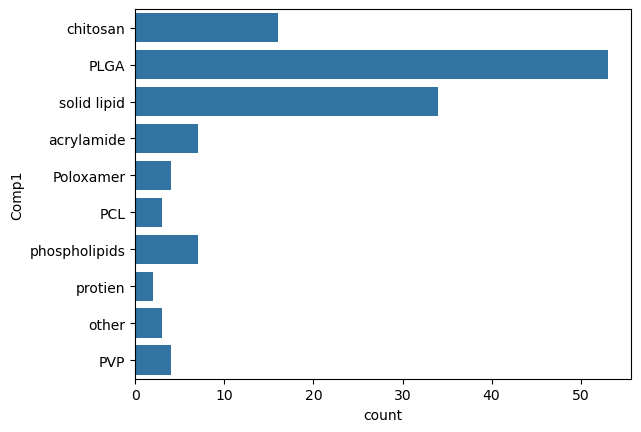

In [49]:
sns.countplot(nanoparticle_data["Comp1"])

Its very easy to make plots look nicer in seaborn

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_30845/568120654.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(nanoparticle_data["Comp1"], palette= "Set2", edgecolor = "k")


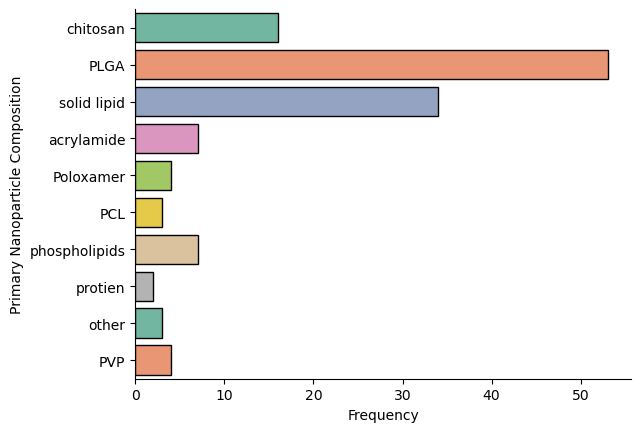

In [56]:
g = sns.countplot(nanoparticle_data["Comp1"], palette= "Set2", edgecolor = "k") ## Palette lets you choose a set of colours: https://www.practicalpythonfordatascience.com/ap_seaborn_palette

## We set the x and y labels
g.set_xlabel("Frequency")
g.set_ylabel("Primary Nanoparticle Composition")

## We remove the black lines on the top and right
sns.despine()

### Exploring variable combinations

Plotting combinations of variables is a bit more tricky, but can be done fairly easily with seaborn.

For both boxplots and barplots - you give the function the X and the Y you want it to plot from the dataframe.

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_30845/1071191817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = nanoparticle_data["Route"], y = nanoparticle_data["Cmax"], palette = "Set2")#, linewidth = 1, edgecolor = "k")


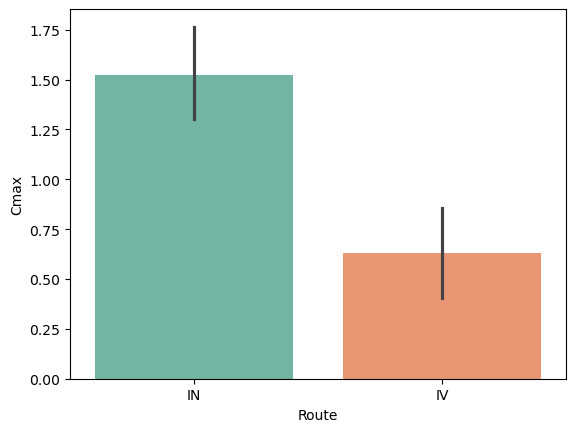

In [63]:
## Here we compare delivery route to Cmax - the maximal concentration of drug in the brain

g = sns.barplot(x = nanoparticle_data["Route"], y = nanoparticle_data["Cmax"], palette = "Set2")#, linewidth = 1, edgecolor = "k")

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_30845/1671947482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = nanoparticle_data["Position"], y = nanoparticle_data["Release"], palette = "Set2")#, linewidth = 1, edgecolor = "k")


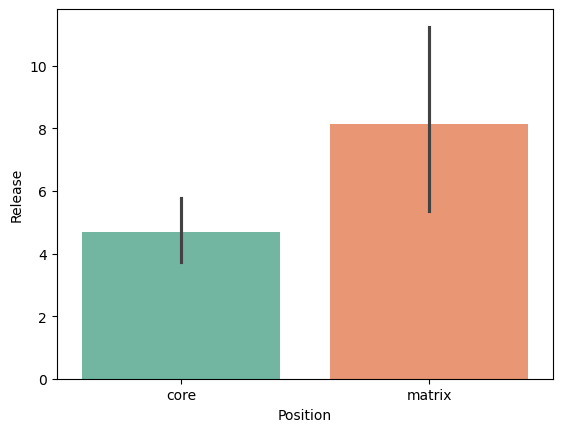

In [65]:
## Here we compare drug position in the particle to release rate

g = sns.barplot(x = nanoparticle_data["Position"], y = nanoparticle_data["Release"], palette = "Set2")#, linewidth = 1, edgecolor = "k")

We can compare numerical variables with a scatterplot - seaborn has a "jointplot" which automatically plots the scatter, along with the histograms for two variables

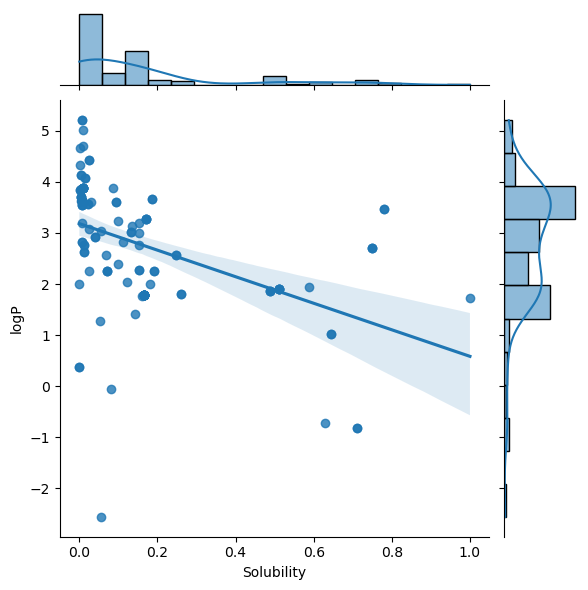

In [76]:
sns.jointplot(x = nanoparticle_data["Solubility"], y = nanoparticle_data["logP"], kind = "reg")

In this case we can see that the Solubility values are not normally distributed, and the correlation might be better with a log-scaled plot. We can convert the data to be log scaled using a library called "numpy" (NUMerical PYthon)

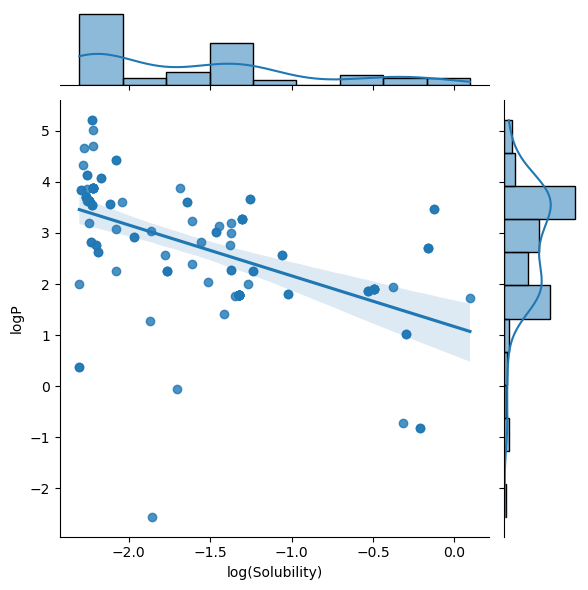

In [83]:
import numpy as np ## We load numpy

## This code makes a new column called "log(Solubility)", which is the log of the Solubility column
nanoparticle_data["log(Solubility)"] = np.log(nanoparticle_data["Solubility"]+0.1) ## Why might we add 0.1 to the values?

g = sns.jointplot(x = nanoparticle_data["log(Solubility)"], y = nanoparticle_data["logP"], kind = "reg")


Its worth thinking about the chemistry/biology implications of some of these comparisons.

#### Question 5

Look through the dataset - and choose a pair of features that you think might be insightful for the study of nanoparticles. Make a graph of that pair of variables

In [84]:
## Insert code here

### Large scale comparisons

Finally - seaborn and matplotlib makes it easy to compare loads of different sets of features

In [94]:
## We first need to select only the numerical columns from the data
nanoparticle_data_numeric = nanoparticle_data.select_dtypes("number")

nanoparticle_data_numeric.head()

,Weight,logP,Solubility,DrugCarrierRatio,Size,Zeta,Cmax,AUC,Tmax,Release,log(Solubility)
0,321.9930,3.01,0.132,1.000,172.40,30.30,2.256,0.594,1.00,2.291667,-1.461018
1,315.4800,4.70,0.009,1.000,122.00,-21.28,1.400,1.879,1.00,1.142857,-2.216407
2,284.7400,2.63,0.012,0.156,170.15,-15.00,1.306,1.361,0.50,2.500000,-2.189256
3,171.2383,2.26,0.025,1.000,153.00,-5.13,1.413,0.591,0.25,6.666667,-2.079442
4,853.9060,3.20,0.006,0.100,136.78,-38.76,0.237,0.190,1.00,2.083333,-2.244316


In [97]:
## The .corr() function performs the pairwise correlation of all the columns
correlation = nanoparticle_data_numeric.corr()

correlation

,Weight,logP,Solubility,DrugCarrierRatio,Size,Zeta,Cmax,AUC,Tmax,Release,log(Solubility)
Weight,1.000000,0.222075,-0.233616,-0.061465,0.031815,0.004323,-0.043763,0.015252,-0.222499,0.041832,-0.242402
logP,0.222075,1.000000,-0.463597,-0.009289,-0.020721,-0.118702,-0.064663,-0.061787,-0.067441,-0.069944,-0.543171
Solubility,-0.233616,-0.463597,1.000000,-0.058083,-0.003960,0.122148,0.049273,0.015700,0.082684,-0.137678,0.949195
DrugCarrierRatio,-0.061465,-0.009289,-0.058083,1.000000,0.054887,0.110693,0.089733,-0.052420,0.023223,0.024454,-0.072310
Size,0.031815,-0.020721,-0.003960,0.054887,1.000000,0.225240,0.061031,0.058689,-0.009364,-0.091923,-0.025647
Zeta,0.004323,-0.118702,0.122148,0.110693,0.225240,1.000000,0.199074,0.160696,0.141420,0.057433,0.163923
Cmax,-0.043763,-0.064663,0.049273,0.089733,0.061031,0.199074,1.000000,0.678048,-0.102405,-0.163615,0.087459
AUC,0.015252,-0.061787,0.015700,-0.052420,0.058689,0.160696,0.678048,1.000000,-0.008483,-0.189255,0.034817
Tmax,-0.222499,-0.067441,0.082684,0.023223,-0.009364,0.141420,-0.102405,-0.008483,1.000000,-0.042462,0.086334
Release,0.041832,-0.069944,-0.137678,0.024454,-0.091923,0.057433,-0.163615,-0.189255,-0.042462,1.000000,-0.168949


<Axes: >

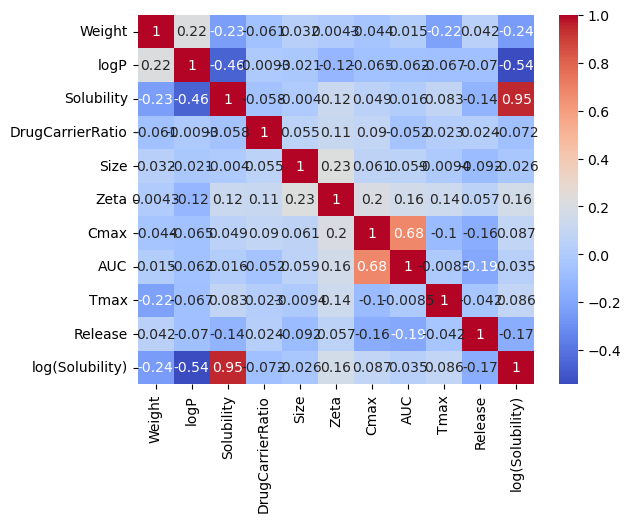

In [107]:
## We can then pass the correlation to the heatmap plot
sns.heatmap(correlation, annot= True, cmap="coolwarm")

<Axes: >

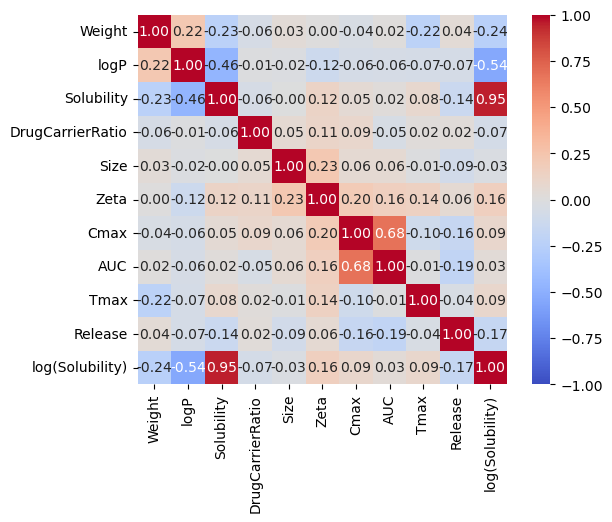

In [108]:
sns.heatmap(correlation, annot= True, cmap="coolwarm", square = True, fmt=".2f", vmin = -1, vmax = 1)

Seaborn also has a "pairplot" graph that will do a pairwise comparison for every pair of columns

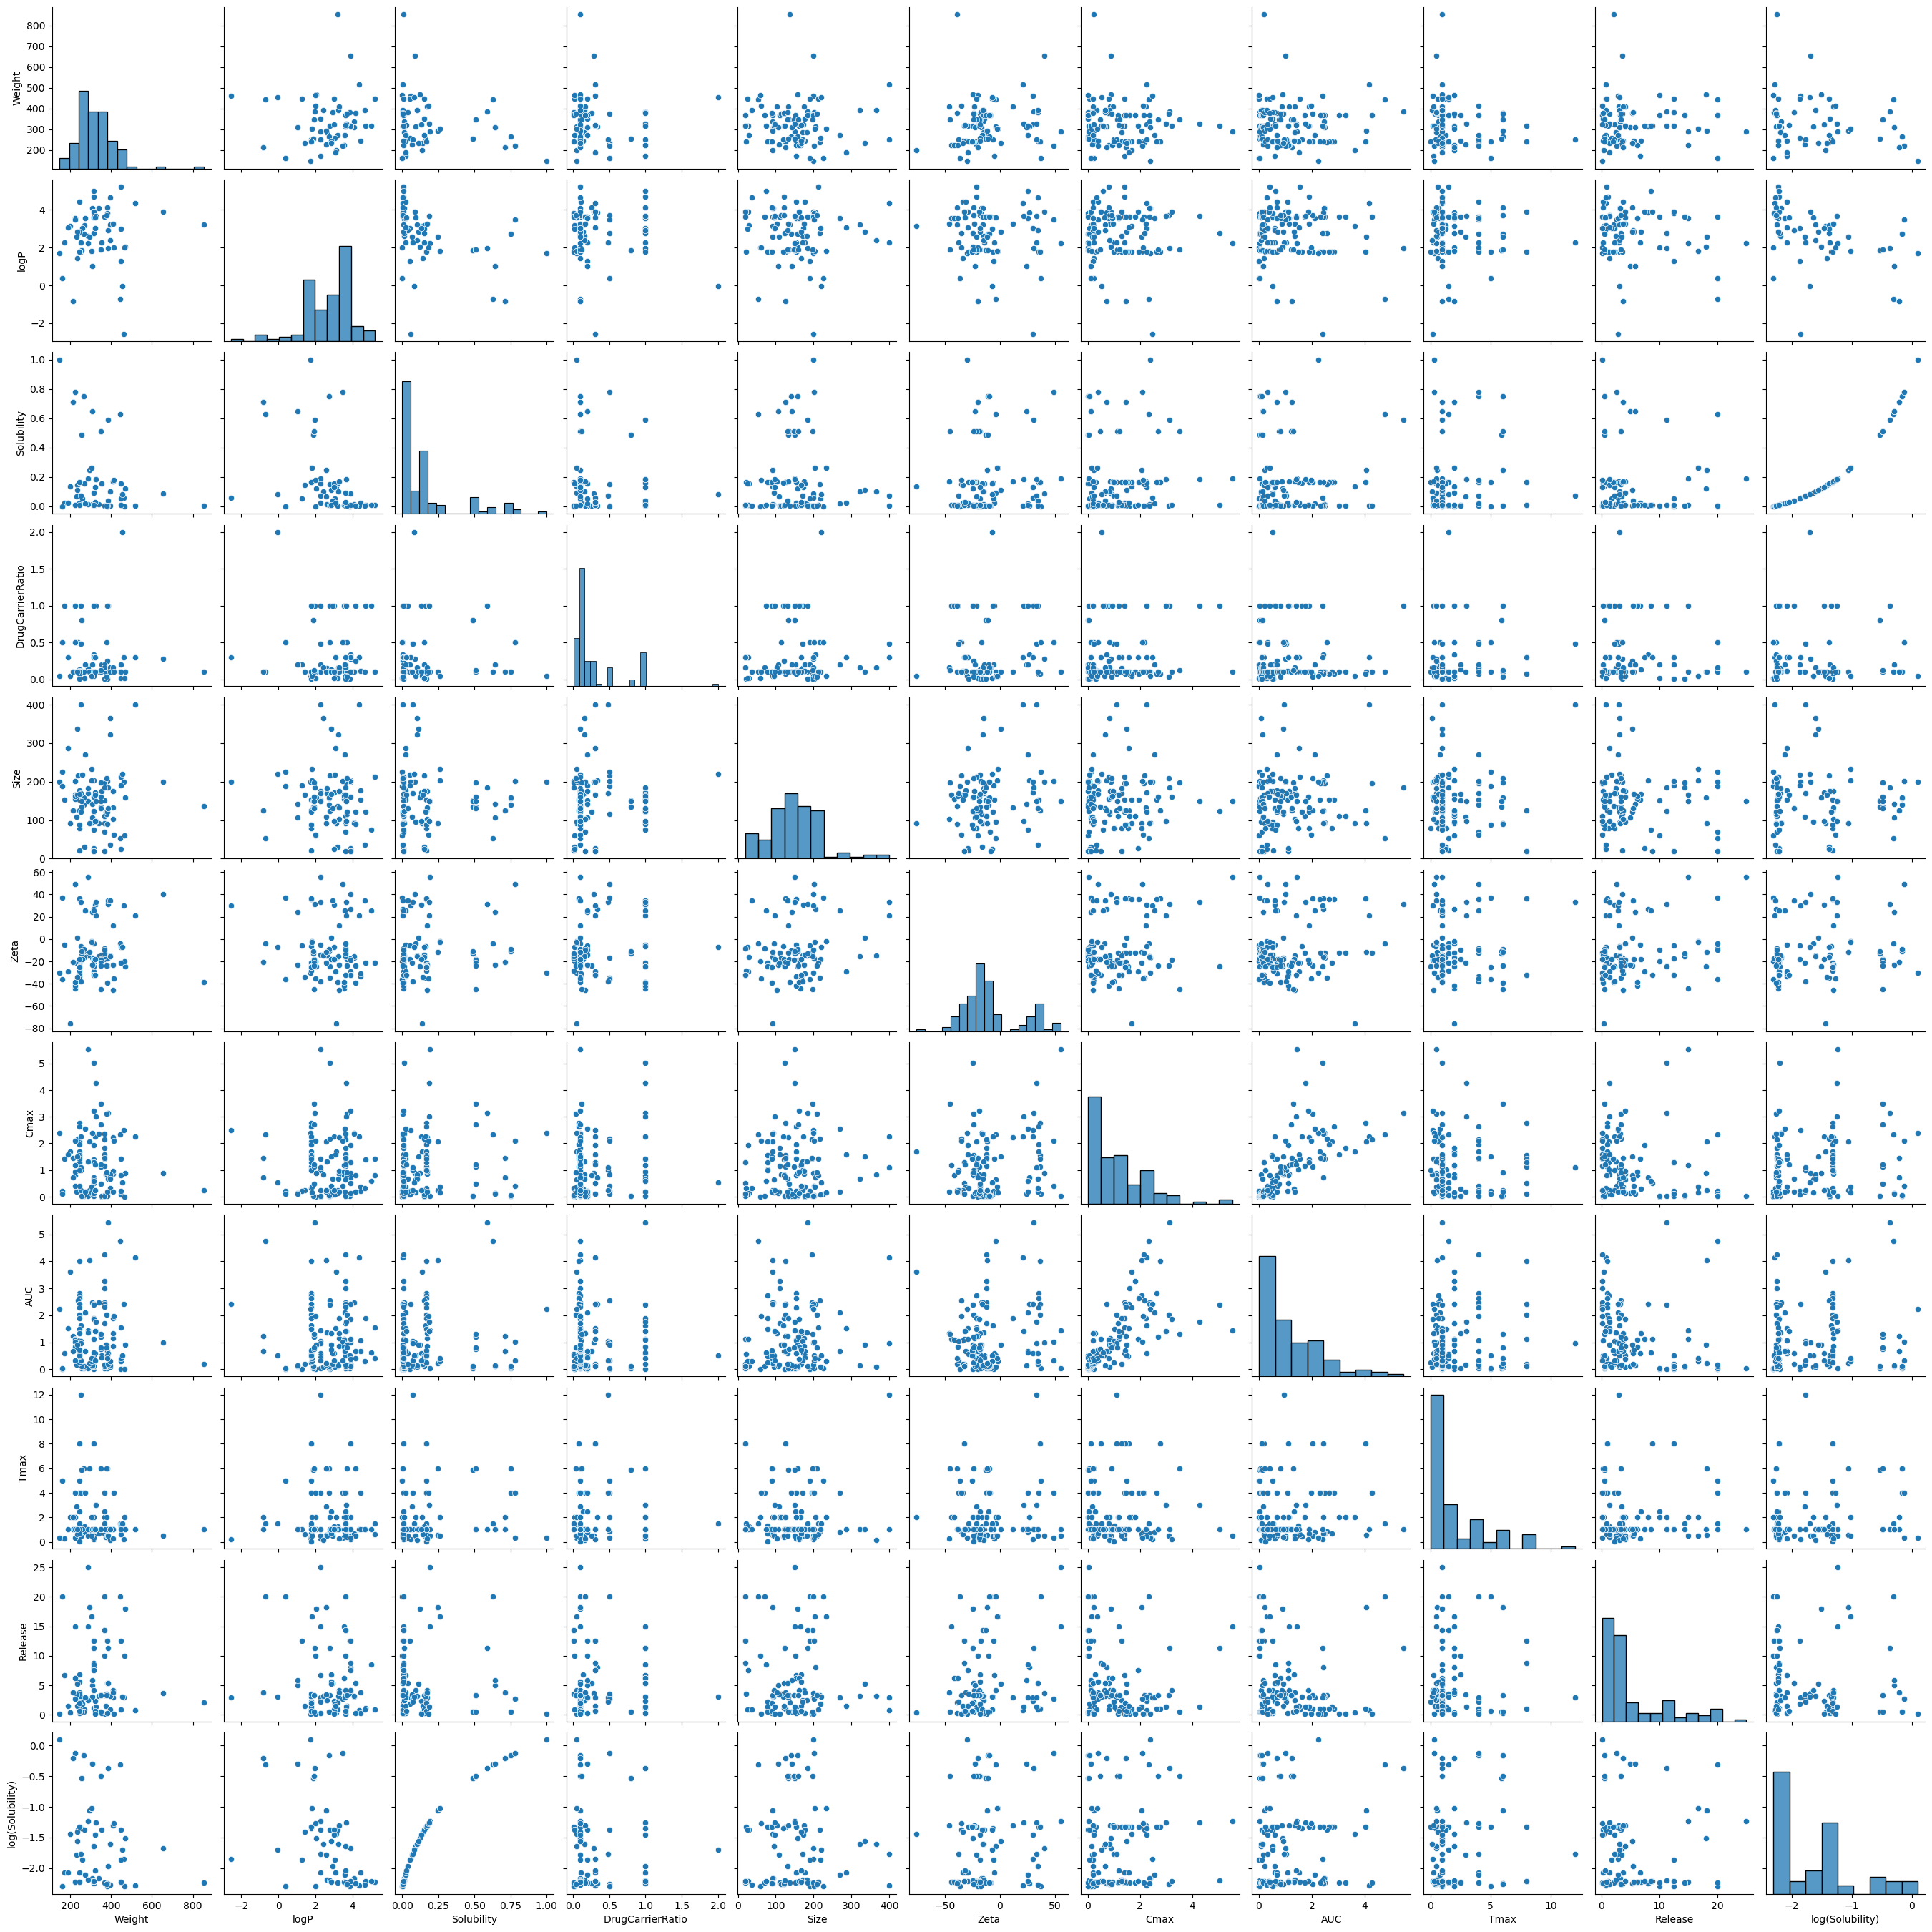

In [109]:
sns.pairplot(nanoparticle_data_numeric)

## EDA of a new dataset

https://www.nature.com/articles/s41597-022-01203-x

https://figshare.com/collections/Cholessterol-Lowering_Drug_Process_and_Quality_Data/5645578/1